# MonReader
## Introduction
**Background:**
- Our company develops innovative Artificial Intelligence and Computer Vision solutions that revolutionize industries. Machines that can see: We pack our solutions in small yet intelligent devices that can be easily integrated to your existing data flow. Computer vision for everyone: Our devices can recognize faces, estimate age and gender, classify clothing types and colors, identify everyday objects and detect motion. Technical consultancy: We help you identify use cases of artificial intelligence and computer vision in your industry. Artificial intelligence is the technology of today, not the future.

- MonReader is a new mobile document digitization experience for the blind, for researchers and for everyone else in need for fully automatic, highly fast and high-quality document scanning in bulk. It is composed of a mobile app and all the user needs to do is flip pages and everything is handled by MonReader: it detects page flips from low-resolution camera preview and takes a high-resolution picture of the document, recognizing its corners and crops it accordingly, and it dewarps the cropped document to obtain a bird's eye view, sharpens the contrast between the text and the background and finally recognizes the text with formatting kept intact, being further corrected by MonReader's ML powered redactor.

**Data Description:**
- We collected page flipping video from smart phones and labelled them as flipping and not flipping.
- We clipped the videos as short videos and labelled them as flipping or not flipping. The extracted frames are then saved to disk in a sequential order with the following naming structure: VideoID_FrameNumber

**Download Data:**
- https://drive.google.com/file/d/1KDQBTbo5deKGCdVV_xIujscn5ImxW4dm/view?usp=sharing

**Goal(s):**
- Predict if the page is being flipped using a single image.

**Success Metrics:**
- Evaluate model performance based on F1 score, the higher the better.

**Bonus(es):**
- Predict if a given sequence of images contains an action of flipping.

### Libraries

In [ ]:
# Warnings imports
from warnings import filterwarnings
filterwarnings("ignore")

# Pandas configuration
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", -1)

# Basic imports
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import random
import pickle
from collections import Counter

# Other imports
import gradio as gr
import PIL

# Sklearn imports
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Tensorflow imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as bk
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers import Dense, Flatten

# Pre-trained models
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.efficientnet import EfficientNetB5
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

### Helper function(s)

In [ ]:
# Prints a horizontal line for delineating outputs
def barrier():
    print("\n <<<", "-" * 50, ">>> \n")

# Saves models
def save_model(model, name):
    with open("models/" + name + ".pkl", "wb") as f:
        pickle.dump(model, f)
    print(f"Model: {name}.pkl saved.")

# Loads models
def load_model(name):
    with open("models/" + name, "rb") as f:
        model = pickle.load(f)
    return model

# Emboldening text
def print_bold(text):
    start = "\033[1m"
    end = "\033[0;0m"
    print(start + str(text) + end)

# Emboldening text
def bold(text):
    start = "\033[1m"
    end = "\033[0;0m"
    return start + str(text) + end

## Dataset

### Load images

In [ ]:
img_height, img_width, img_channels = 180, 180, 3
batch_size = 32
data_dir = "../images/training"
test_data_dir = "../images/testing"
loading_dataset_seed = 0

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=loading_dataset_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=loading_dataset_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed=loading_dataset_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
# Shape of training data
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

In [ ]:
classes_names = train_ds.class_names
print(classes_names)

In [ ]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes_names[labels[i]])
        plt.axis("off")

plt.show()

In [ ]:
def evaluate_model(model, test_data):
    results = {}    
    predicted_labels = []
    true_labels = []
    all_images = []
    for images, labels in test_data:
        true_labels.extend(labels.numpy())
        predicted_labels.extend(tf.argmax(model.predict(images), axis=1).numpy())
    # Accuracy
    results["accuracy"] = accuracy_score(true_labels, predicted_labels)
    # F1 Score
    results["f1_score"] = f1_score(true_labels, predicted_labels)
    cm = confusion_matrix(true_labels, predicted_labels)
    class_names = test_data.class_names
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return results

In [ ]:
# model = 
# test_data = 

# results = {}    
# predicted_labels = []
# true_labels = []
# all_images = []

# for images, labels in test_data:
#     true_labels.extend(labels.numpy())
#     predicted_labels.extend(tf.argmax(model.predict(images), axis=1).numpy())

# # Accuracy
# results["accuracy"] = accuracy_score(true_labels, predicted_labels)

# # F1 Score
# results["f1_score"] = f1_score(true_labels, predicted_labels)
# cm = confusion_matrix(true_labels, predicted_labels)
# class_names = test_data.class_names
# results

# ######################################################################################################################

# # plt.figure(figsize=(8, 6))
# # sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
# # plt.xlabel("Predicted Labels")
# # plt.ylabel("True Labels")
# # plt.title("Confusion Matrix")
# # plt.show()

## Models

### Custom

In [ ]:
custom_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(img_width, img_height, img_channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    # Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(len(classes_names), activation="softmax")])

custom_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
custom_model.summary()

In [ ]:
custom_model_history = custom_model.fit(train_ds, validation_data=val_ds, epochs=7)

#### Evaluating The Model

In [ ]:
fig1 = plt.gcf()
plt.plot(custom_model_history.history["accuracy"])
plt.plot(custom_model_history.history["val_accuracy"])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title("Custom Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

In [ ]:
plt.plot(custom_model_history.history["loss"])
plt.plot(custom_model_history.history["val_loss"])
plt.grid()
plt.title("Custom Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

In [ ]:
custom_model_evaluation = evaluate_model(custom_model, test_ds)

#### Save Model

In [ ]:
custom_model_path = "../models/custom_model.h5"
custom_model.save(custom_model_path)
custom_model_size = os.path.getsize(custom_model_path)/(1024*1024)
print(f"Model size: {custom_model_size:.2f} MB")

### ResNet

In [ ]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False, input_shape=(img_width, img_height, img_channels),
                                                 pooling="avg", classes=len(classes_names), weights="imagenet")

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
resnet_model.add(layers.Dense(len(classes_names), activation="softmax"))
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy",
                     metrics=["accuracy"])

In [ ]:
resnet_model.summary()

In [ ]:
resnet_model_history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=5)

#### Evaluating The Model

In [ ]:
fig1 = plt.gcf()
plt.plot(resnet_model_history.history["accuracy"])
plt.plot(resnet_model_history.history["val_accuracy"])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title("ResNet Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

In [ ]:
plt.plot(resnet_model_history.history["loss"])
plt.plot(resnet_model_history.history["val_loss"])
plt.grid()
plt.title("ResNet Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

In [ ]:
resnet_model_evaluation = evaluate_model(resnet_model, test_ds)

#### Save model

In [ ]:
resnet_model_path = "../models/resnet_model.weights.h5"
resnet_model.save_weights(resnet_model_path)

resnet_model_size = os.path.getsize(resnet_model_path)/(1024*1024)
print(f"Model size: {resnet_model_size:.2f} MB")

### MobileNet

In [ ]:
mobilenet_model = Sequential()

mobilenet_pretrained_model= tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False,
    input_shape=(img_width, img_height, img_channels),
    pooling="avg",
    weights="imagenet")

for layer in mobilenet_pretrained_model.layers:
    layer.trainable=False

mobilenet_model.add(mobilenet_pretrained_model)
mobilenet_model.add(layers.Flatten())
mobilenet_model.add(layers.Dense(512, activation="relu"))
mobilenet_model.add(layers.Dense(len(classes_names), activation="softmax"))

mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy",
                        metrics=["accuracy"])

In [ ]:
mobilenet_model.summary()

In [ ]:
mobilenet_model_history = mobilenet_model.fit(train_ds, validation_data=val_ds, epochs=10)

#### Evaluating The Model

In [ ]:
fig1 = plt.gcf()
plt.plot(mobilenet_model_history.history["accuracy"])
plt.plot(mobilenet_model_history.history["val_accuracy"])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title("MobileNet Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

In [ ]:
plt.plot(mobilenet_model_history.history["loss"])
plt.plot(mobilenet_model_history.history["val_loss"])
plt.grid()
plt.title("MobileNet Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

In [ ]:
mobilenet_model_evaluation = evaluate_model(mobilenet_model, test_ds)

#### Save Model

In [ ]:
mobilenet_model_path = "../models/mobilenet_model.weights.h5"
mobilenet_model.save_weights(mobilenet_model_path)
mobilenet_model_size = os.path.getsize(mobilenet_model_path)/(1024*1024)
print(f"Model size: {mobilenet_model_size:.2f} MB")

### Final model collation

In [ ]:
values = {"accuracy":[custom_model_evaluation["accuracy"],
                      resnet_model_evaluation["accuracy"],
                      mobilenet_model_evaluation["accuracy"]],
          "f1_score":[custom_model_evaluation["f1_score"],
                      resnet_model_evaluation["f1_score"],
                      mobilenet_model_evaluation["f1_score"]],
          "model size":[np.round(custom_model_size, 2),
                        np.round(resnet_model_size, 2),
                        np.round(mobilenet_model_size, 2)]}

df = pd.DataFrame(values, index=["custom_model", "resnet", "mobilenet"])
df

## Post analysis
- Here we will plot and analyze the incorrectly classified images from the test dataset.

In [158]:
X = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed=loading_dataset_seed,
    image_size=(img_height, img_width),
    batch_size=1)

Found 597 files belonging to 2 classes.


In [188]:
X.class_names

['flip', 'notflip']

In [164]:
images = []
labels = []
predictions = []

for image, label in X:
    images.append(image)
    labels.append(label.numpy()[0])

In [170]:
for image in images:
    predictions.extend(tf.argmax(mobilenet_model.predict(image,verbose=0), axis=1).numpy())

In [166]:
mask = np.array(labels)!=np.array(predictions)
mask.sum(), len(mask), mask.sum()/len(mask)

(21, 597, 0.035175879396984924)

**NOTE:**
- We re-imported the test data
- We noted that the class names are as we expect
- We see that the model incorrectly predicted 21 out of 597 images. This is 97% accuracy.
- We will now **plot the incorrectly classified images** to see if any insight can be gleamed as to why

### Sample plot

INCORRECT MODEL PREDICTIONS:


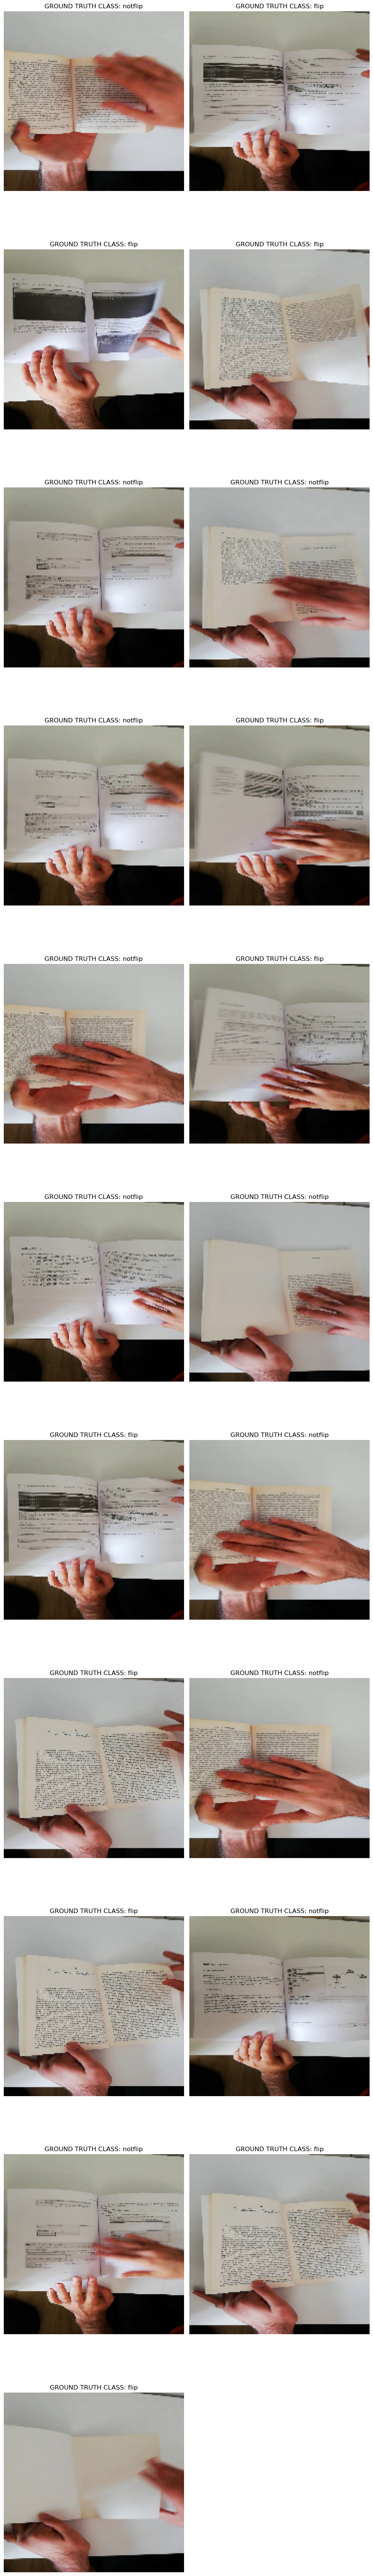

In [189]:
images_wrongly_predicted = np.array(images)[mask]
labels_wrongly_predicted = np.array(labels)[mask]
rows = math.ceil(len(images_wrongly_predicted)/2)
index = range(1, len(images_wrongly_predicted)+1)
plt.figure(figsize=(10, 70))
print_bold("INCORRECT MODEL PREDICTIONS:")

for i, image, label in zip(index, images_wrongly_predicted, labels_wrongly_predicted):
    ax = plt.subplot(rows, 2, i)
    plt.imshow(image[0].astype("uint8"))
    plt.title(f"GROUND TRUTH CLASS: {classes_names[label]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

**NOTE:**
- As noted above, the model accuracy of around 97% on the test set is very good.
- For the misclassified images, there are many potential reason for their misclassification including:
    - Low quality/resolution image
    - Difficult to interpret image
    - Ambiguous labelling of image